In [ ]:
!pip install -q spacy sentence-transformers
!python -m spacy download en_core_web_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 837.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 105.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload 

In [ ]:
import pandas as pd
import spacy
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Load spaCy and stopword-aware lemmatizer
nlp = spacy.load("en_core_web_sm")

def spacy_lemmatize(text):
    doc = nlp(text.lower())
    return " ".join([token.lemma_ for token in doc if token.is_alpha and not token.is_stop])
# Mount your Google Drive
drive.mount('/content/drive')

# Replace the path accordingly
df = pd.read_csv('/content/drive/MyDrive/stemma/manuscript_items_07_07_25.csv')

with open('/content/drive/MyDrive/stemma/themes.txt', 'r') as file:
    themes = [line.strip() for line in file if line.strip()]


Mounted at /content/drive


In [ ]:
# Build poem-only content (exclude titles/headings)
df.fillna("", inplace=True)
df["poem_lines"] = (
    df["First Line"] + " " +
    df["Second Line"] + " " +
    df["Penultimate Line"] + " " +
    df["Last Line"]
).str.strip()

# Lemmatize poem lines (use batch processing for speed)
texts = df["poem_lines"].tolist()
lemmatized_poems = []
for doc in nlp.pipe(texts, batch_size=64, disable=["ner", "parser"]):
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    lemmatized_poems.append(" ".join(tokens))

df["lemmatized_poem"] = lemmatized_poems




/tmp/ipython-input-5-460206124.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("", inplace=True)


In [ ]:
# Reuse the same spacy_lemmatize() function
lemmatized_themes = [spacy_lemmatize(theme) for theme in themes]

In [ ]:


model = SentenceTransformer('all-MiniLM-L6-v2')

# Embed lemmatized poems
#poem_embeddings = model.encode(df["lemmatized_poem"].tolist(), show_progress_bar=True)


from tqdm import tqdm

texts = df["lemmatized_poem"].tolist()
batch_size = 64
embeddings = []

for i in tqdm(range(0, len(texts), batch_size)):
    batch = texts[i:i+batch_size]
    emb = model.encode(batch)
    embeddings.extend(emb)



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

100%|██████████| 2492/2492 [26:51<00:00,  1.55it/s]


In [ ]:
import numpy as np

poem_embeddings = np.array(embeddings)


# Embed themes
theme_embeddings = model.encode(lemmatized_themes, show_progress_bar=True)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import numpy as np

# Group by manuscript (Shelfmark)
manuscript_embeddings = {}

for shelfmark in df["Shelfmark"].unique():
    mask = df["Shelfmark"] == shelfmark
    if mask.sum() > 0:
        manuscript_embeddings[shelfmark] = np.mean(poem_embeddings[mask], axis=0)


In [ ]:
# Prepare data
manuscript_names = list(manuscript_embeddings.keys())
manuscript_vectors = np.array([manuscript_embeddings[m] for m in manuscript_names])

# Cosine similarity
similarity_matrix = cosine_similarity(manuscript_vectors, theme_embeddings)

# Build DataFrame for heatmap
theme_similarity_df = pd.DataFrame(similarity_matrix, index=manuscript_names, columns=themes)


/tmp/ipython-input-29-2709861880.py:7: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


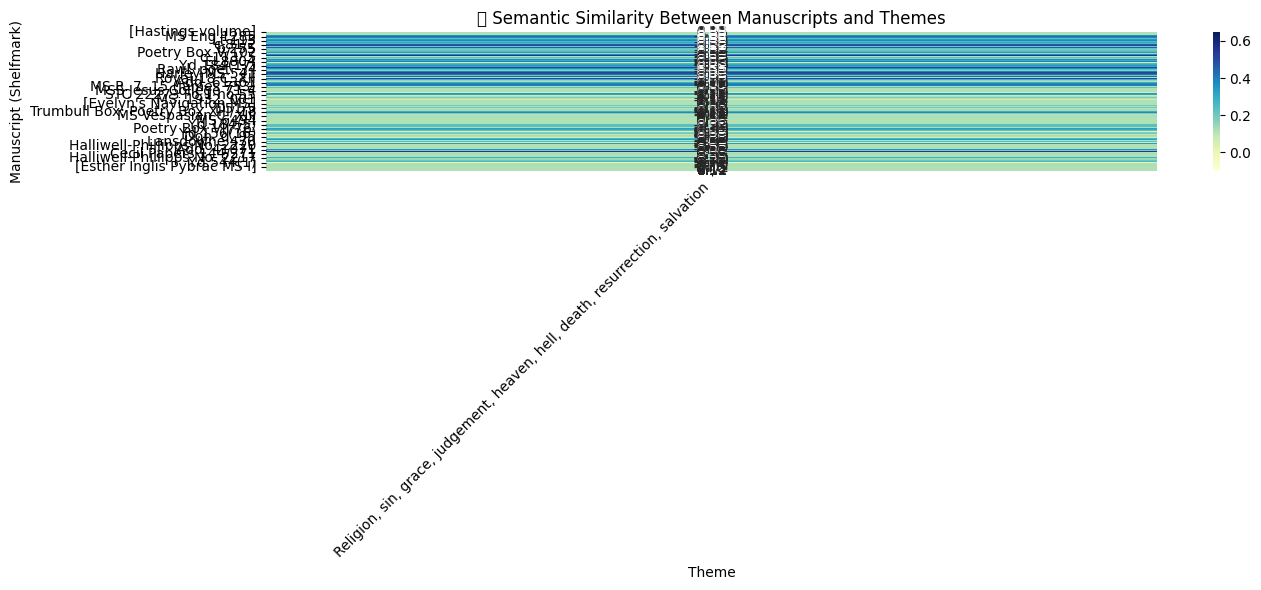

In [ ]:
plt.figure(figsize=(14, 6))
sns.heatmap(theme_similarity_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("📚 Semantic Similarity Between Manuscripts and Themes")
plt.xlabel("Theme")
plt.ylabel("Manuscript (Shelfmark)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-30-796086921.py:17: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


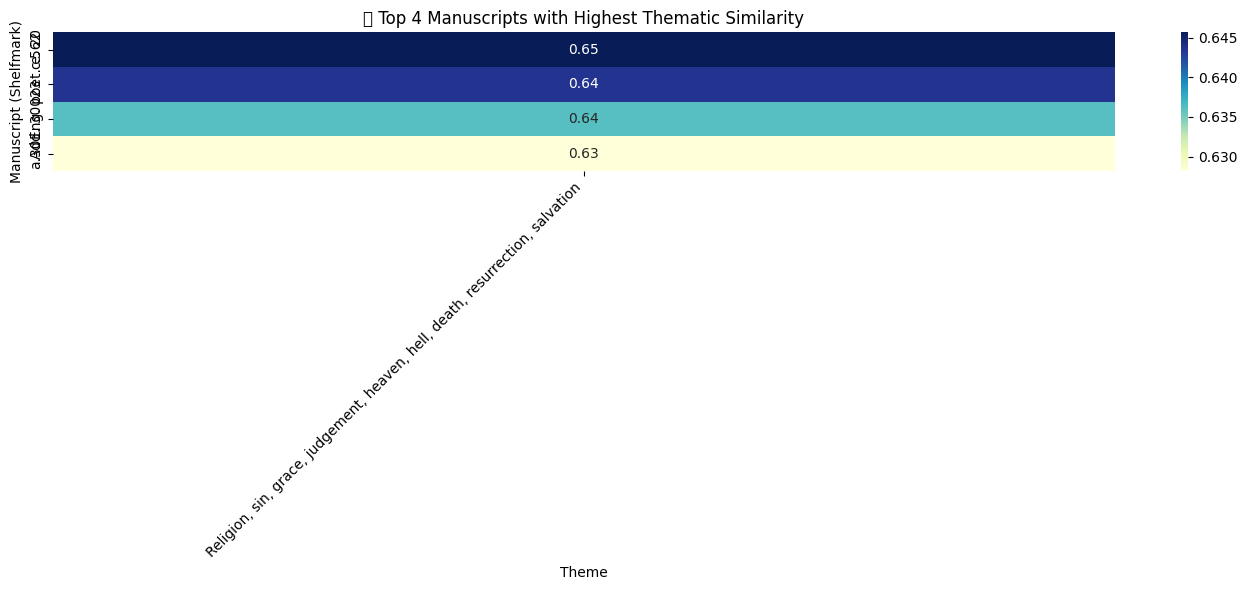

In [ ]:
# Step 1: Get max similarity per manuscript (i.e., strongest theme alignment)
theme_similarity_df["max_similarity"] = theme_similarity_df.max(axis=1)

# Step 2: Sort manuscripts by highest similarity and keep top 4
top4_df = theme_similarity_df.sort_values("max_similarity", ascending=False).head(4)

# Step 3: Drop helper column for plotting
top4_df = top4_df.drop(columns="max_similarity")

# Step 4: Plot heatmap for top 4 manuscripts
plt.figure(figsize=(14, 6))
sns.heatmap(top4_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("📚 Top 4 Manuscripts with Highest Thematic Similarity")
plt.xlabel("Theme")
plt.ylabel("Manuscript (Shelfmark)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-31-2903441111.py:33: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


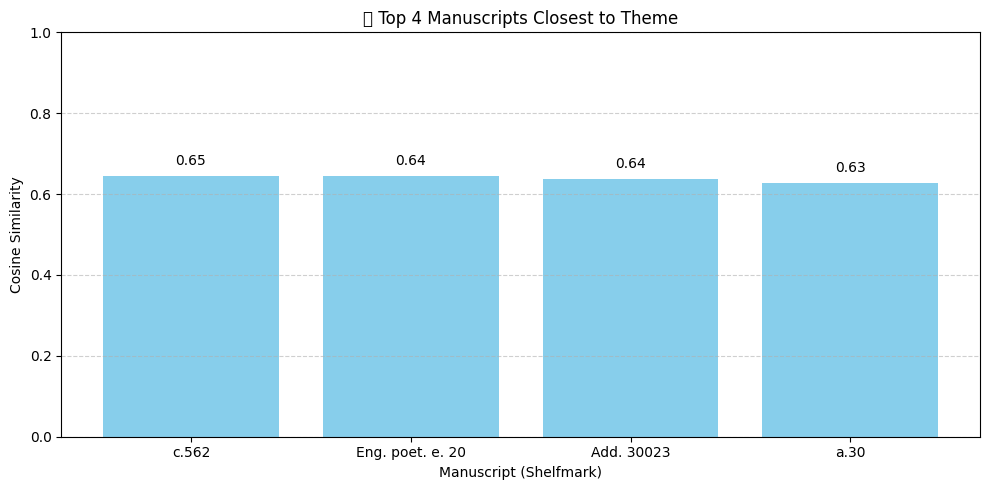

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# We'll assume theme_embeddings has only 1 theme
theme_vector = theme_embeddings[0]

# Compute cosine similarity for each manuscript
similarities = {}
for shelfmark, vec in manuscript_embeddings.items():
    sim = cosine_similarity([vec], [theme_vector])[0][0]
    similarities[shelfmark] = sim

# Get top 4 most similar manuscripts
top_4 = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:4]

# Separate keys and values
manuscripts, scores = zip(*top_4)

# ✅ Bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(manuscripts, scores, color='skyblue')
plt.ylim(0, 1)
plt.title("🔍 Top 4 Manuscripts Closest to Theme")
plt.xlabel("Manuscript (Shelfmark)")
plt.ylabel("Cosine Similarity")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


/tmp/ipython-input-32-285787839.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top4.index, y=top4.values, palette="viridis")
/tmp/ipython-input-32-285787839.py:23: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


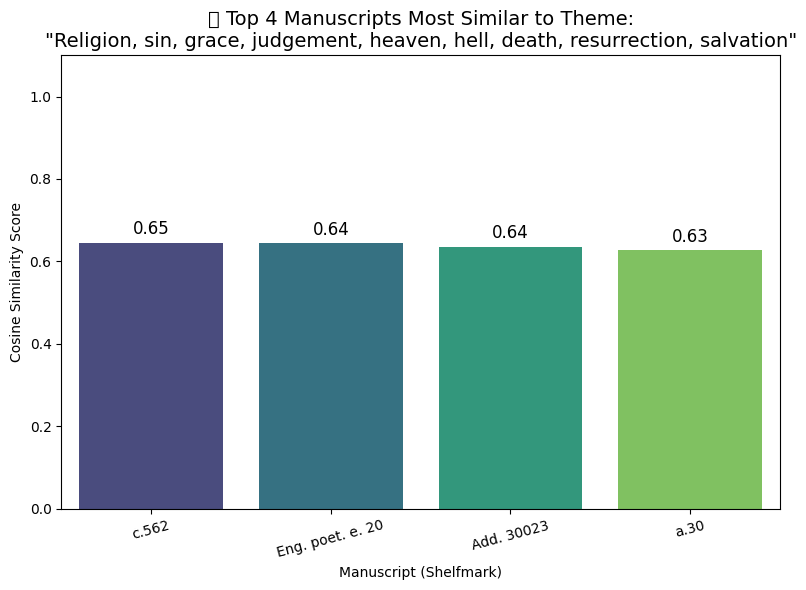

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Extract the single theme name
single_theme = theme_similarity_df.columns[0]

# ✅ Get top 4 most similar manuscripts based on cosine similarity
top4 = theme_similarity_df[single_theme].sort_values(ascending=False).head(4)

# ✅ Plot vertical bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=top4.index, y=top4.values, palette="viridis")

# ✅ Add value labels on top of bars
for index, value in enumerate(top4.values):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=12)

plt.ylim(0, 1.1)
plt.title(f"📖 Top 4 Manuscripts Most Similar to Theme:\n\"{single_theme}\"", fontsize=14)
plt.ylabel("Cosine Similarity Score")
plt.xlabel("Manuscript (Shelfmark)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [ ]:
!pip install -q umap-learn


In [ ]:
import umap
import matplotlib.pyplot as plt

# Combine poem + theme vectors
all_vectors = np.vstack([poem_embeddings, theme_embeddings])
labels = ['Poem'] * len(poem_embeddings) + ['Theme'] * len(theme_embeddings)

# Reduce to 2D
reducer = umap.UMAP(random_state=42)
embedding_2d = reducer.fit_transform(all_vectors)

# Split back
poem_coords = embedding_2d[:len(poem_embeddings)]
theme_coords = embedding_2d[len(poem_embeddings):]


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisati

/tmp/ipython-input-37-485922721.py:15: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


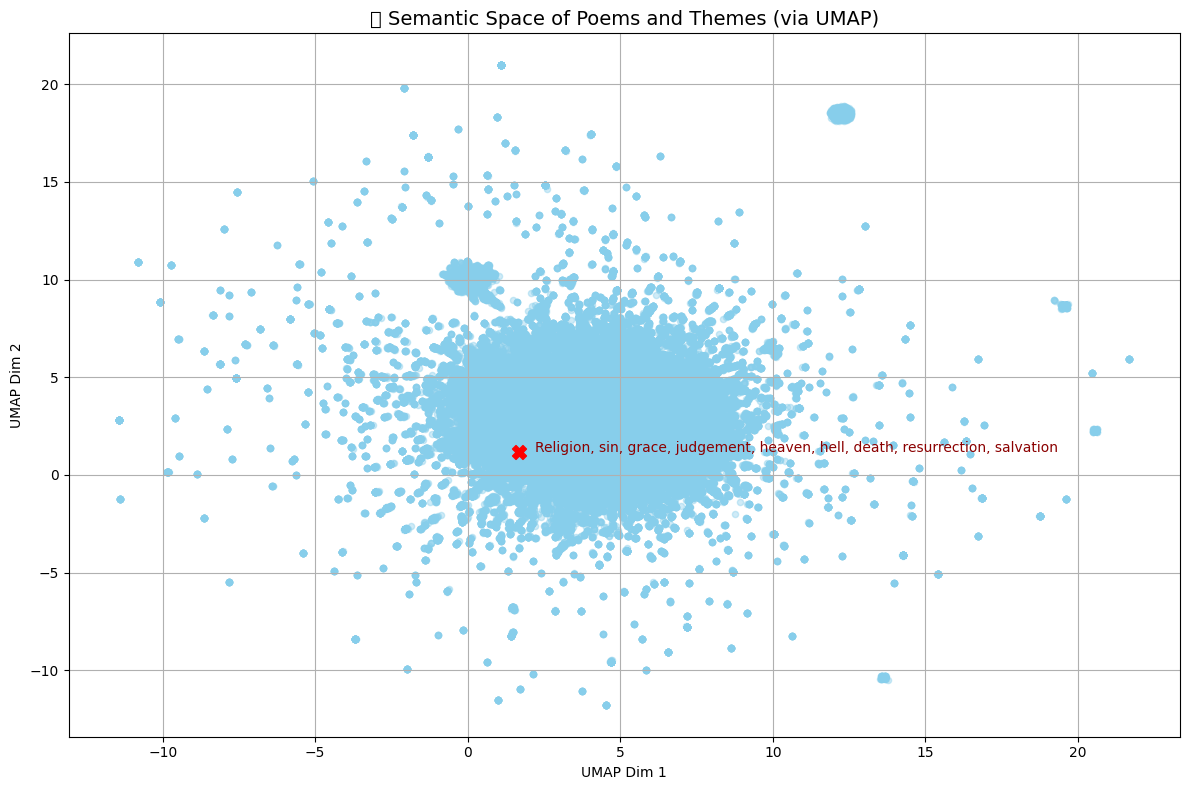

In [ ]:
plt.figure(figsize=(12, 8))

# Plot poems
plt.scatter(poem_coords[:, 0], poem_coords[:, 1], alpha=0.4, label="Poems", s=20, color='skyblue')

# Plot themes with labels
for i, (x, y) in enumerate(theme_coords):
    plt.scatter(x, y, color='red', s=100, marker='X')
    plt.text(x + 0.5, y, themes[i], fontsize=10, color='darkred')

plt.title("🧠 Semantic Space of Poems and Themes (via UMAP)", fontsize=14)
plt.xlabel("UMAP Dim 1")
plt.ylabel("UMAP Dim 2")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-39-3069406941.py:55: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


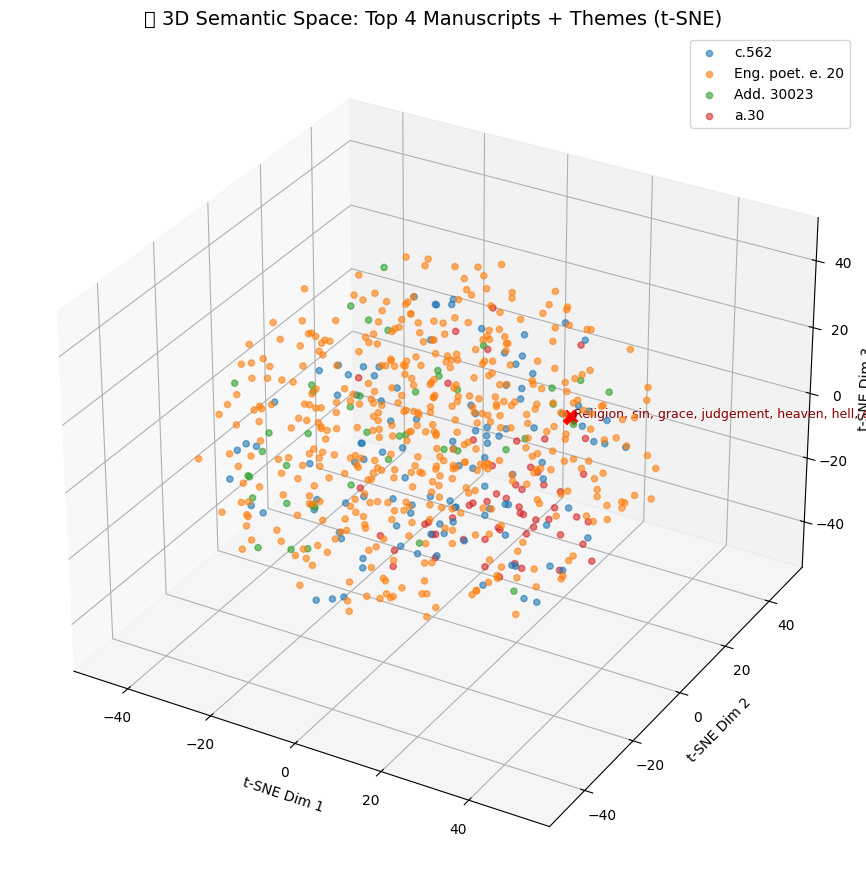

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import seaborn as sns

# ✅ Step 1: Extract top 4 manuscripts from theme similarity
top4_manuscripts = top4_df.index.tolist()

# ✅ Step 2: Filter poems from those manuscripts
df_top4 = df[df["Shelfmark"].isin(top4_manuscripts)].copy()
indices_top4 = df_top4.index.tolist()

# ✅ Step 3: Get corresponding poem embeddings
poem_embeddings_top4 = poem_embeddings[indices_top4]

# ✅ Step 4: Combine with theme embeddings
combined_vectors = np.vstack([poem_embeddings_top4, theme_embeddings])

# ✅ Step 5: Apply 3D t-SNE
reducer_3d = TSNE(n_components=3, random_state=42, perplexity=30)
embedding_3d = reducer_3d.fit_transform(combined_vectors)

# ✅ Step 6: Split back into poem + theme coordinates
poem_coords = embedding_3d[:len(df_top4)]
theme_coords = embedding_3d[len(df_top4):]

# ✅ Step 7: Plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Color palette
palette = sns.color_palette("tab10", len(top4_manuscripts))
color_map = {shelf: palette[i] for i, shelf in enumerate(top4_manuscripts)}

# Plot each manuscript's poems
for shelfmark in top4_manuscripts:
    mask = df_top4["Shelfmark"] == shelfmark
    coords = poem_coords[mask.values]
    ax.scatter(coords[:, 0], coords[:, 1], coords[:, 2],
               label=shelfmark, s=20, alpha=0.6, color=color_map[shelfmark])

# Plot themes
for i, (x, y, z) in enumerate(theme_coords):
    ax.scatter(x, y, z, color='red', s=100, marker='X')
    ax.text(x + 1, y, z, themes[i], fontsize=9, color='darkred')

# Labels and formatting
ax.set_title("🧠 3D Semantic Space: Top 4 Manuscripts + Themes (t-SNE)", fontsize=14)
ax.set_xlabel("t-SNE Dim 1")
ax.set_ylabel("t-SNE Dim 2")
ax.set_zlabel("t-SNE Dim 3")
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 📌 1. Select the target manuscript
target_manuscript = "MS Tanner 307"
df_manuscript = df[df["Shelfmark"] == target_manuscript].copy()

# ❗ Sanity check
if df_manuscript.empty:
    raise ValueError(f"No poems found for Shelfmark: {target_manuscript}")

# 📌 2. Get poem embeddings for this manuscript
poem_indices = df_manuscript.index.tolist()
manuscript_vectors = poem_embeddings[poem_indices]

# 📌 3. Average to get manuscript-level embedding
manuscript_embedding = np.mean(manuscript_vectors, axis=0, keepdims=True)

# 📌 4. Compute similarity to each theme
similarities = cosine_similarity(manuscript_embedding, theme_embeddings)[0]

# 📌 5. Create a theme similarity table
theme_scores = pd.DataFrame({
    "Theme": themes,
    "Similarity": similarities
}).sort_values("Similarity", ascending=False)

# 🖨️ Display
print(f"\n📜 Semantic Similarity Scores for: {target_manuscript}")
display(theme_scores)

# 📌 6. Stack vectors for visualization (poems + themes + manuscript centroid)
combined_vectors = np.vstack([manuscript_vectors, theme_embeddings, manuscript_embedding])

# 📌 7. Reduce to 3D using t-SNE
tsne = TSNE(n_components=3, perplexity=10, random_state=42)
embedding_3d = tsne.fit_transform(combined_vectors)

# 📌 8. Split coordinates
n_poems = len(df_manuscript)
n_themes = len(themes)
poem_coords = embedding_3d[:n_poems]
theme_coords = embedding_3d[n_poems:n_poems + n_themes]
manuscript_coord = embedding_3d[-1]

# 📌 9. 3D Plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# 🎨 Poems
ax.scatter(poem_coords[:, 0], poem_coords[:, 1], poem_coords[:, 2],
           color='skyblue', label='Poems', alpha=0.6)

# 🔺 Manuscript centroid
ax.scatter(manuscript_coord[0], manuscript_coord[1], manuscript_coord[2],
           color='green', s=120, marker='^', label='Manuscript Centroid')

# ❌ Themes and their similarity scores
for i, (x, y, z) in enumerate(theme_coords):
    ax.scatter(x, y, z, color='red', s=100, marker='X')
    ax.text(x + 1, y, z, f"{themes[i]}\n({similarities[i]:.2f})", fontsize=9, color='darkred')

# Final touches
ax.set_title(f"🧠 3D Semantic Map of '{target_manuscript}' vs Themes", fontsize=14)
ax.set_xlabel("t-SNE Dim 1")
ax.set_ylabel("t-SNE Dim 2")
ax.set_zlabel("t-SNE Dim 3")
ax.legend()
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

/tmp/ipython-input-34-4102280675.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top4.index, x=top4.values, palette="viridis")
/tmp/ipython-input-34-4102280675.py:22: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


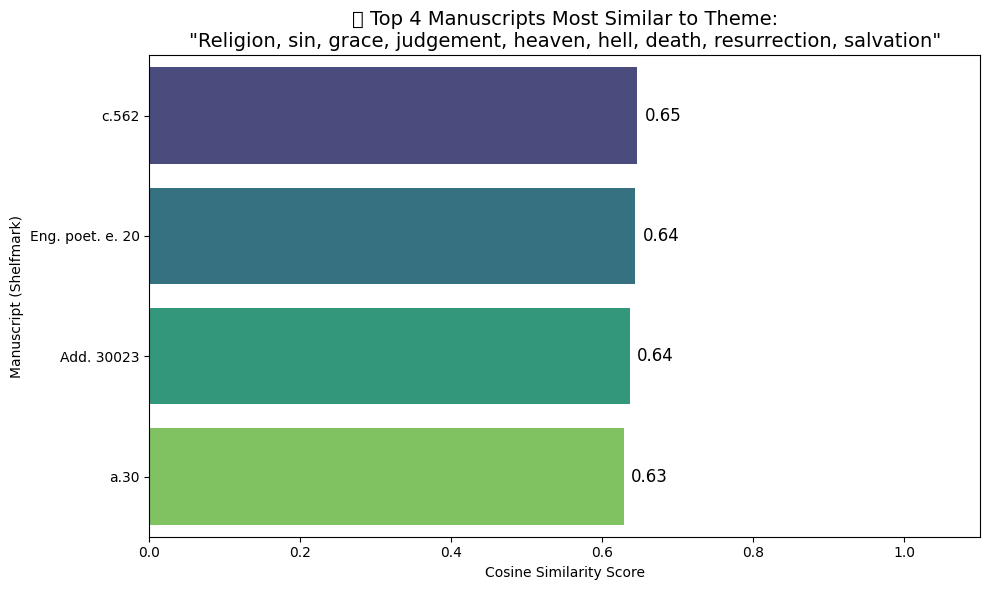

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Extract the single theme name
single_theme = theme_similarity_df.columns[0]

# ✅ Get top 4 most similar manuscripts
top4 = theme_similarity_df[single_theme].sort_values(ascending=False).head(4)

# ✅ Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=top4.index, x=top4.values, palette="viridis")

# ✅ Add value labels at the end of each bar
for index, value in enumerate(top4.values):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center', fontsize=12)

plt.xlim(0, 1.1)
plt.title(f"📖 Top 4 Manuscripts Most Similar to Theme:\n\"{single_theme}\"", fontsize=14)
plt.xlabel("Cosine Similarity Score")
plt.ylabel("Manuscript (Shelfmark)")
plt.tight_layout()
plt.show()


/tmp/ipython-input-33-470238088.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Similarity", y="Shelfmark", data=sim_subset, palette="coolwarm")
/tmp/ipython-input-33-470238088.py:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


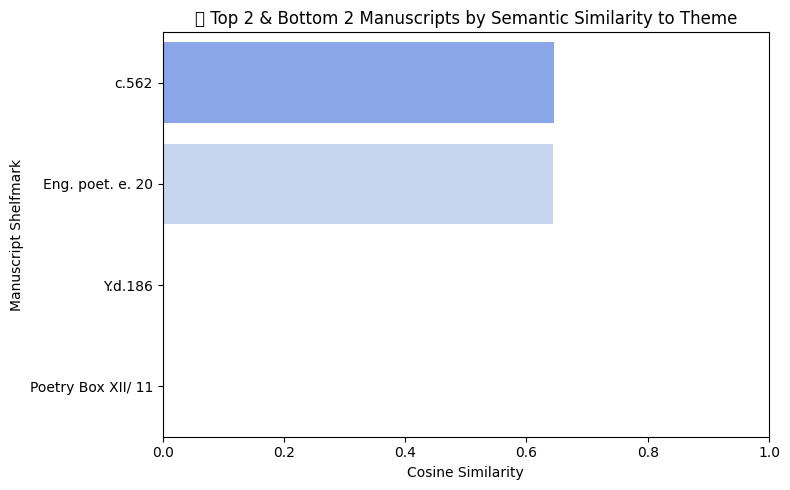

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Convert manuscript embeddings to list format
manuscript_names = list(manuscript_embeddings.keys())
manuscript_vectors = np.array([manuscript_embeddings[m] for m in manuscript_names])

# Use cosine similarity against the single theme (index 0)
theme_vector = theme_embeddings[0]
similarities = cosine_similarity(manuscript_vectors, [theme_vector]).flatten()

# Build DataFrame
sim_df = pd.DataFrame({
    "Shelfmark": manuscript_names,
    "Similarity": similarities
})

# Sort by similarity
sim_df_sorted = sim_df.sort_values(by="Similarity", ascending=False)

# Select top 2 and bottom 2
sim_subset = pd.concat([
    sim_df_sorted.head(2),
    sim_df_sorted.tail(2)
])

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Similarity", y="Shelfmark", data=sim_subset, palette="coolwarm")
plt.title("📊 Top 2 & Bottom 2 Manuscripts by Semantic Similarity to Theme")
plt.xlabel("Cosine Similarity")
plt.ylabel("Manuscript Shelfmark")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import spacy
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


In [ ]:
# Mount your Google Drive
drive.mount('/content/drive')

# Load CSV and theme list
df = pd.read_csv('/content/drive/MyDrive/stemma/manuscript_items_07_07_25.csv')

with open('/content/drive/MyDrive/stemma/themes.txt', 'r') as f:
    themes = [line.strip() for line in f if line.strip()]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")



# Combine poem lines (no title or heading)
df.fillna("", inplace=True)
df["poem_lines"] = (
    df["First Line"] + " " +
    df["Second Line"] + " " +
    df["Penultimate Line"] + " " +
    df["Last Line"]
).str.strip()

# Efficient lemmatization using nlp.pipe
def lemmatize_texts(texts):
    lemmatized = []
    for doc in nlp.pipe(texts, batch_size=64, disable=["ner", "parser"]):
        tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
        lemmatized.append(" ".join(tokens))
    return lemmatized

# Lemmatize all poems
df["lemmatized_poem"] = lemmatize_texts(df["poem_lines"].tolist())


/tmp/ipython-input-22-1889546470.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("", inplace=True)


In [ ]:

# Combine lemmatized poems per manuscript
manuscript_docs = df_top.groupby("Shelfmark")["lemmatized_poem"].apply(lambda lines: " ".join(lines)).to_dict()

# Convert to list format
manuscript_names = list(manuscript_docs.keys())
manuscript_texts = list(manuscript_docs.values())



In [ ]:
theme_lemmas = lemmatize_texts(themes)


In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2")

# Encode manuscripts and themes
manuscript_embeddings = model.encode(manuscript_texts, show_progress_bar=True)
theme_embeddings = model.encode(theme_lemmas, show_progress_bar=True)

# Compute cosine similarity
similarity_matrix = cosine_similarity(manuscript_embeddings, theme_embeddings)

# Convert to DataFrame
similarity_df = pd.DataFrame(similarity_matrix, index=manuscript_names, columns=themes)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/tmp/ipython-input-26-3064052321.py:14: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


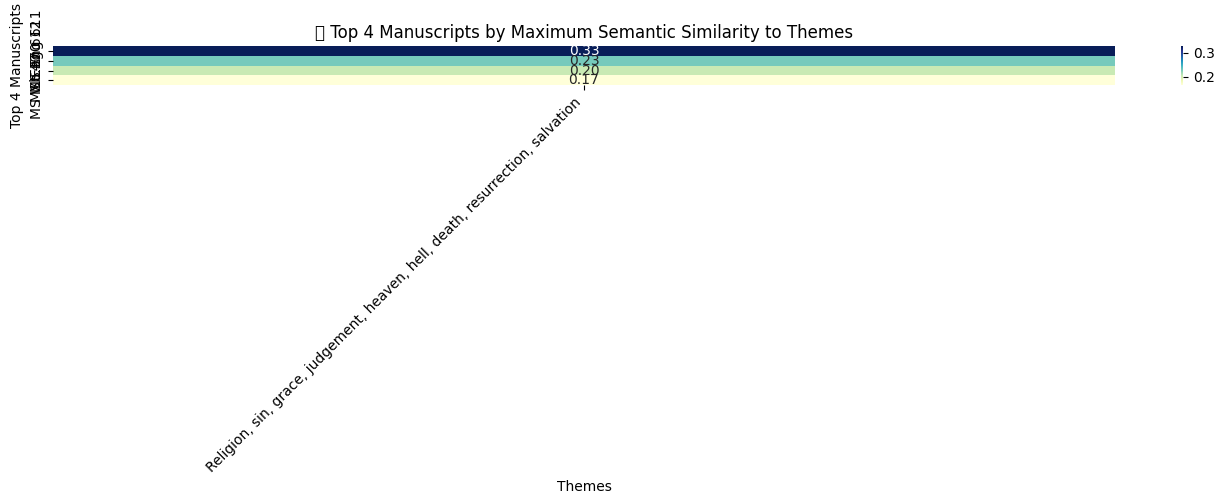

In [ ]:
# Calculate the maximum similarity to any theme for each manuscript
similarity_df["Max_Similarity"] = similarity_df.max(axis=1)

# Sort manuscripts by max similarity and take top 4
top4_df = similarity_df.sort_values("Max_Similarity", ascending=False).drop("Max_Similarity", axis=1).head(4)

# Plot heatmap for top 4
plt.figure(figsize=(14, 5))
sns.heatmap(top4_df, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("📚 Top 4 Manuscripts by Maximum Semantic Similarity to Themes")
plt.xlabel("Themes")
plt.ylabel("Top 4 Manuscripts")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-27-2167042407.py:7: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


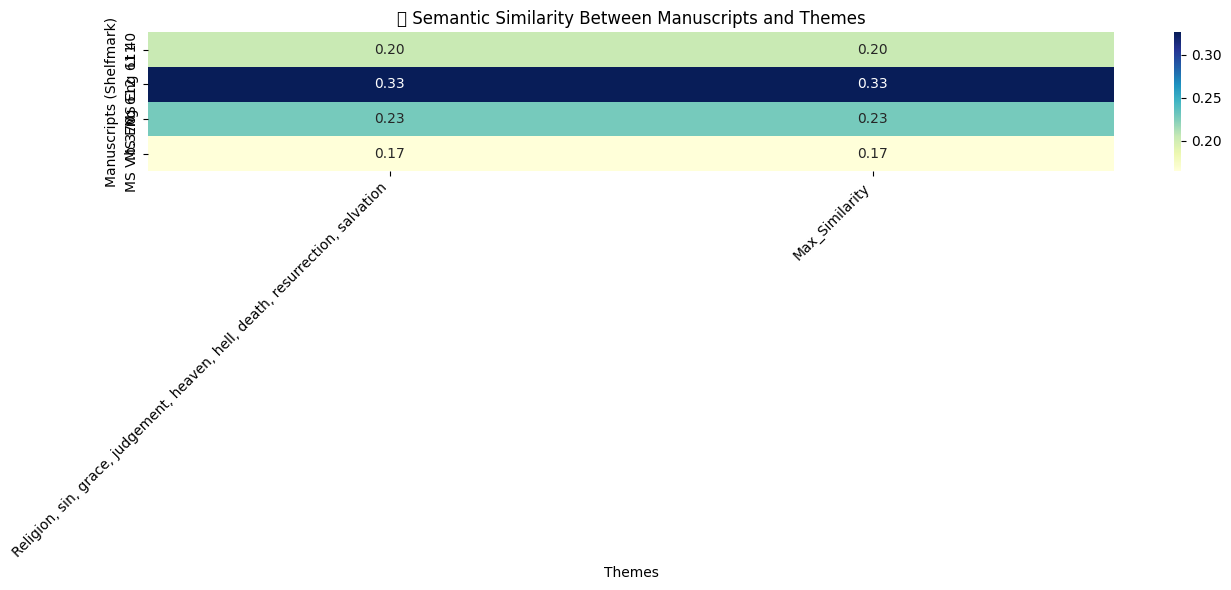

In [ ]:
plt.figure(figsize=(14, 6))
sns.heatmap(similarity_df, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("📚 Semantic Similarity Between Manuscripts and Themes")
plt.xlabel("Themes")
plt.ylabel("Manuscripts (Shelfmark)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-28-3865225604.py:19: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


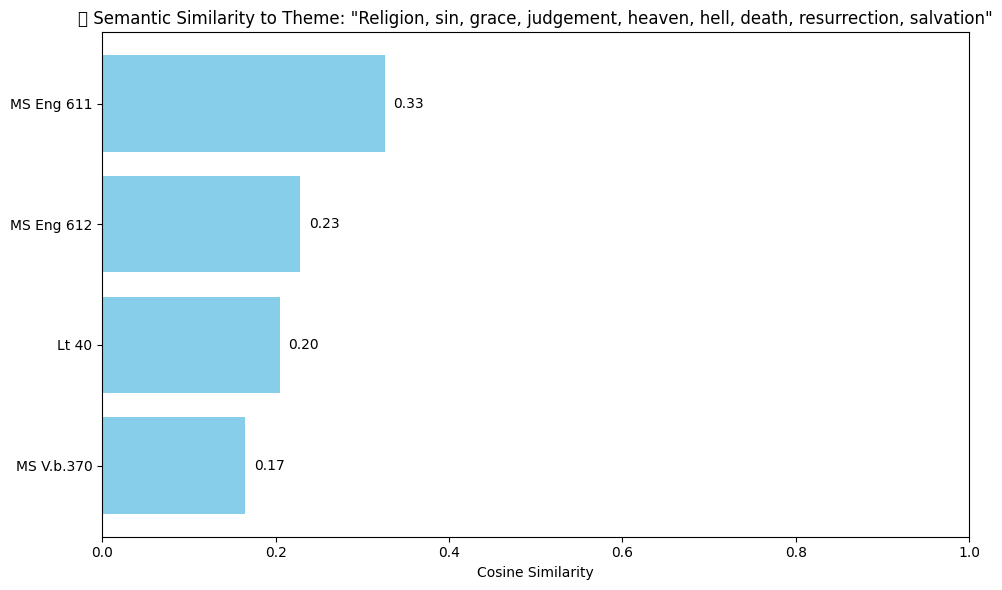

In [ ]:
import matplotlib.pyplot as plt

# Assuming similarity_df has only one column (your single theme)
theme_name = similarity_df.columns[0]
similarity_series = similarity_df[theme_name].sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(similarity_series.index, similarity_series.values, color='skyblue')
plt.xlabel("Cosine Similarity")
plt.title(f"📘 Semantic Similarity to Theme: \"{theme_name}\"")
plt.xlim(0, 1.0)

# Add score labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va='center')

plt.tight_layout()
plt.show()
